# Mission n°2
Ensuite, vous réaliserez l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes : 

Vous devrez y utiliser au moins :

- des indicateurs de tendance centrale et de dispersion
- une analyse de concentration, via une courbe de Lorenz et un indice de Gini
- des représentations graphiques, dont au moins un histogramme, une représentation avec des "boites à moustaches", et une représentation de série temporelle (c’est à dire un graphique dont l’axe des abscisses représente des dates)
- des analyses bivariées

In [1]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# chargement de la table jointure
jointure = pd.read_csv("jointure.csv")
jointure.head()

,id_prod,date,session_id,client_id,price,categ,sex,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2,f,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1,f,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0,m,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0,f,42


In [3]:
# nous allons classer les variables dans un ordre plus cohérent
jointure = jointure[['session_id','date','id_prod','price','categ','client_id','sex','age']]
jointure.head()

,session_id,date,id_prod,price,categ,client_id,sex,age
0,s_18746,2021-04-10 18:37:28.723910,0_1483,4.99,0,c_4450,f,45
1,s_159142,2022-02-03 01:55:53.276402,2_226,65.75,2,c_277,f,22
2,s_94290,2021-09-23 15:13:46.938559,1_374,10.71,1,c_4270,f,43
3,s_105936,2021-10-17 03:27:18.783634,0_2186,4.20,0,c_4597,m,59
4,s_63642,2021-07-17 20:34:25.800563,0_1351,8.99,0,c_1242,f,42


# Indicateurs de tendance centrale et de dispersion

In [4]:
# calcul de la moyenne et de l'écart-type sur la variable 'price' de la table jointure
jointure['price'].describe()

count    336816.000000
mean         17.213511
std          17.852973
min           0.620000
25%           8.610000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [5]:
# calcul de la moyenne et de l'écart-type sur la variable 'age' de la table jointure
jointure['age'].describe()

count    336816.000000
mean         44.176604
std          13.523923
min          18.000000
25%          35.000000
50%          42.000000
75%          51.000000
max          93.000000
Name: age, dtype: float64

# Représentation avec un histogramme

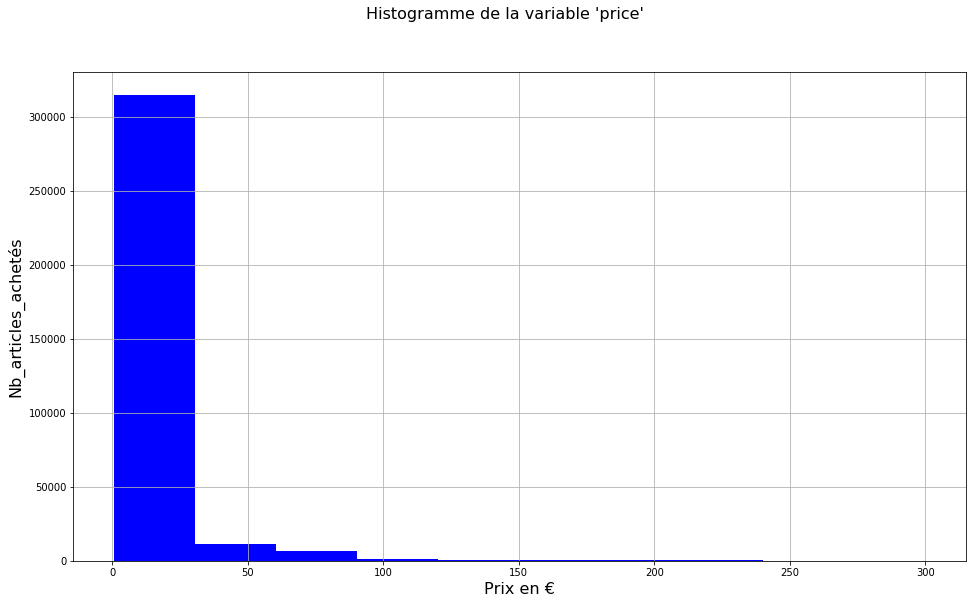

In [6]:
# représentation graphique de la variable 'price' à l'aide d'un histogramme
jointure['price'].hist(figsize=(16,9), color='b')
plt.xlabel("Prix en €", fontsize=16)  
plt.ylabel("Nb_articles_achetés", fontsize=16)
plt.suptitle("Histogramme de la variable 'price'", fontsize=16)
plt.savefig('histo_1')
plt.show()

# Analyse de concentration, via une courbe de Lorenz et un indice de Gini

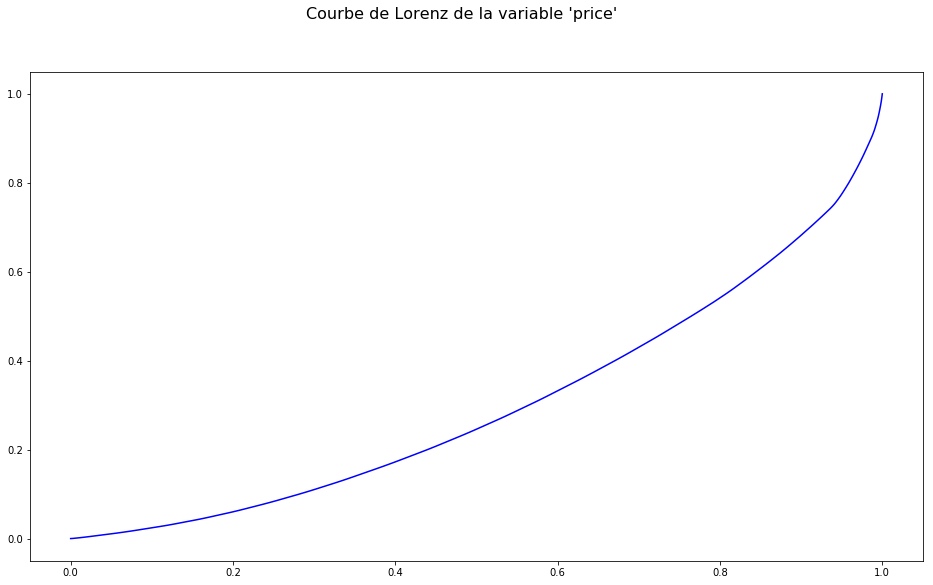

In [7]:
# nous allons afficher une courbe de Lorenz sur la variable 'price'
price = jointure['price'].values
lorenz = np.cumsum(np.sort(price)) / price.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# affichage du plot
plt.figure(figsize=(16,9))
plt.suptitle("Courbe de Lorenz de la variable 'price'", fontsize=16)
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post', color='b')
plt.savefig('lorenz_1')
plt.show()

In [8]:
# la répartition des prix entre les objets semble égalitaire

In [9]:
# nous allons afficher l'indice de Gini sur la variable 'price'
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.39210732826417016

In [10]:
# l'indice de Gini vient confirmer notre impression visuelle avec la courbe de Lorenz

# Représentation avec des "boîtes à moustaches"

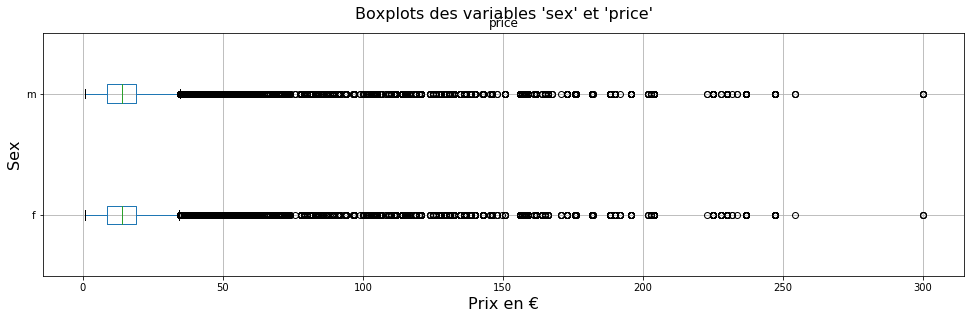

In [11]:
# nous allons afficher le boxplot prenant en variables :
# qualitative : 'sex'
# quantitative : 'price'
jointure.boxplot(column='price',by='sex',vert=False,figsize=(16,4.5))
plt.xlabel("Prix en €", fontsize=16)  
plt.ylabel("Sex", fontsize=16)
plt.suptitle("Boxplots des variables 'sex' et 'price'", fontsize=16)
plt.savefig('boxplot_1')
plt.show()

In [12]:
# les deux distributions semblent proches

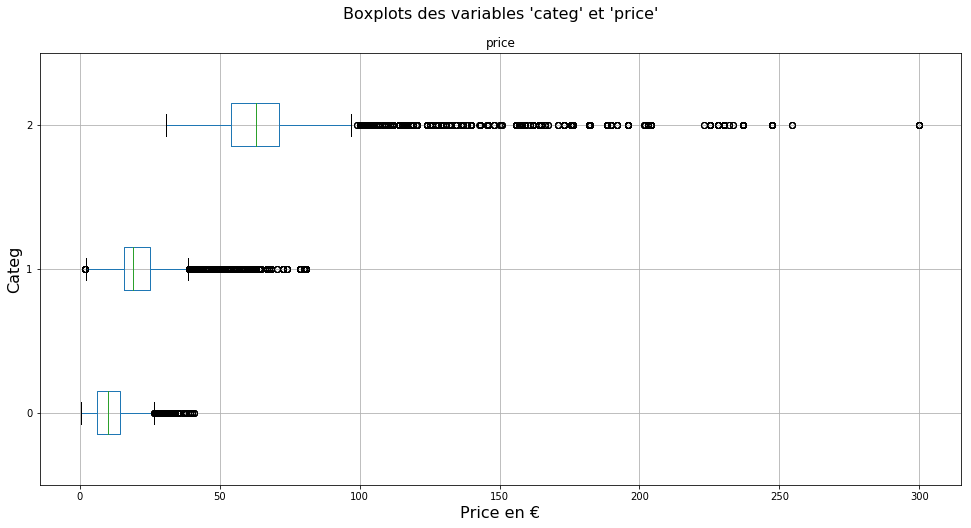

In [13]:
# pour une meilleur comparaison, nous intégrons les 3 boxplots dans 1 seul graphique
jointure.boxplot(column='price', by='categ', vert=False, figsize=(16,8))
plt.xlabel("Price en €", fontsize=16)  
plt.ylabel("Categ", fontsize=16)
plt.suptitle("Boxplots des variables 'categ' et 'price'", fontsize=16)
plt.savefig('boxplot_2')
plt.show()

In [14]:
# nous pouvons affirmer, que le sexe des clients semble influer sur le categ des articles achetés

# Représentation de série temporelle 

c’est à dire un graphique dont l’axe des abscisses représente des dates

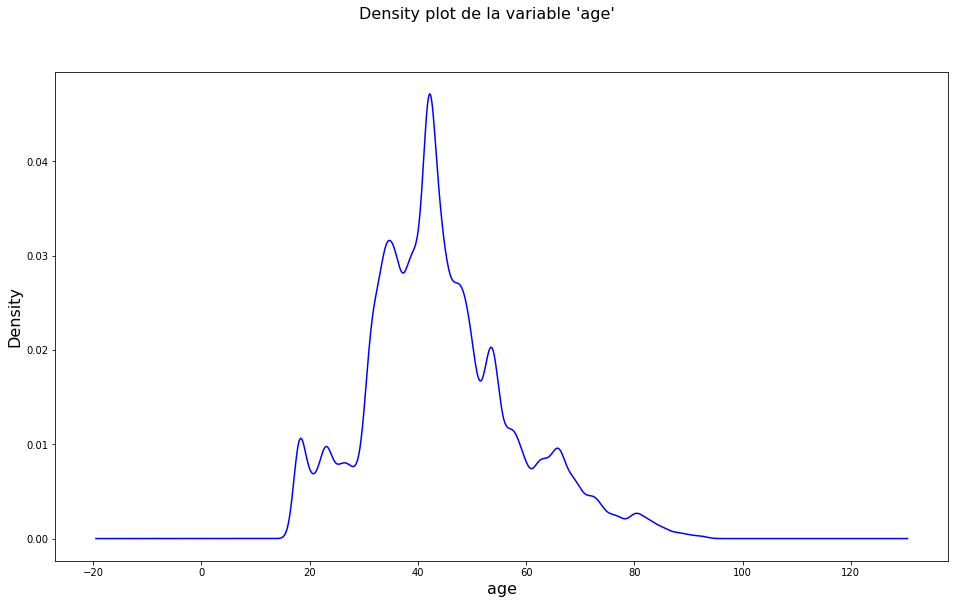

In [15]:
# Affichage du density plot pour détecter en fonction de l'âge, les clients les plus nombreux, ainsi
# que la présence de valeurs aberrantes
jointure["age"].plot(kind="density", figsize=(16,9), color='b') 
plt.xlabel("age", fontsize=16) 
plt.ylabel("Density", fontsize=16)  
plt.suptitle("Density plot de la variable 'age'", fontsize=16)
plt.savefig('density_plot_1')
plt.show()

# Analyses bivariées

In [16]:
# montant total des achats par client 
gb_client_id = jointure.groupby('client_id')
gb_client_id = gb_client_id['price'].sum(min_count=1)
gb_client_id = gb_client_id.reset_index()
gb_client_id.columns = ['client_id','montant_achats']
gb_client_id['%_du_CA'] = (gb_client_id.montant_achats / gb_client_id.montant_achats.sum()) * 100
gb_client_id.sort_values(by='montant_achats',ascending=False)[0:8]

,client_id,montant_achats,%_du_CA
677,c_1609,162007.34,2.794297
4388,c_4958,144257.21,2.488143
6337,c_6714,73220.80,1.262910
2724,c_3454,54466.38,0.939434
7715,c_7959,2564.25,0.044228
7791,c_8026,2549.40,0.043972
3870,c_4491,2540.53,0.043819
1268,c_2140,2527.01,0.043586


In [17]:
# les 4 premières valeurs correspondent peut-être à des clients professionnels au regard des montants
# nous pourrions penser à des contrats passés avec des établissements scolaires pour se fournir en manuels 
# scolaires
# il serait pertinent de les isoler, (en cas d'utilisation de méthodes peu robustes aux outliers )
# nous allons donc créer un sous_échantillon nommé 'sous_jointure'

# création d'une liste contenant les clients à retirer du sous-échantillon
Liste = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

# utilisation de la liste sur le dataframe
sous_jointure = jointure.loc[~jointure.client_id.isin(Liste), :].copy()

In [18]:
# relance de l'étape précédente
gb_client_id = sous_jointure.groupby('client_id')
gb_client_id = gb_client_id['price',].sum(min_count=1)
gb_client_id = gb_client_id.reset_index()
gb_client_id.columns = ['client_id','montant_achats']
gb_client_id['%_du_CA'] = (gb_client_id.montant_achats / gb_client_id.montant_achats.sum()) * 100
gb_client_id.sort_values(by='montant_achats',ascending=False).head()

,client_id,montant_achats,%_du_CA
7711,c_7959,2564.25,0.047806
7787,c_8026,2549.40,0.047529
3868,c_4491,2540.53,0.047364
1267,c_2140,2527.01,0.047112
8191,c_8392,2515.98,0.046906


In [19]:
# test du type de la variable 'date'
type(sous_jointure.date[0])

str

In [20]:
# nous allons redéfinir la date comme une date et non une variable textuelle
sous_jointure['date'] = pd.to_datetime(sous_jointure['date'], errors='coerce')
type(sous_jointure.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
# nous allons modifier le format de la variable 'date'
sous_jointure['dates_simplifiees'] = sous_jointure.date.map(lambda x: x.strftime('%Y-%m'))
sous_jointure.head()

,session_id,date,id_prod,price,categ,client_id,sex,age,dates_simplifiees
0,s_18746,2021-04-10 18:37:28.723910,0_1483,4.99,0,c_4450,f,45,2021-04
1,s_159142,2022-02-03 01:55:53.276402,2_226,65.75,2,c_277,f,22,2022-02
2,s_94290,2021-09-23 15:13:46.938559,1_374,10.71,1,c_4270,f,43,2021-09
3,s_105936,2021-10-17 03:27:18.783634,0_2186,4.20,0,c_4597,m,59,2021-10
4,s_63642,2021-07-17 20:34:25.800563,0_1351,8.99,0,c_1242,f,42,2021-07


In [22]:
# nous allons classer les variables dans un ordre plus cohérent
sous_jointure = sous_jointure[['session_id','date','dates_simplifiees','id_prod','price','categ','client_id','sex',
                               'age']]
sous_jointure.head()

,session_id,date,dates_simplifiees,id_prod,price,categ,client_id,sex,age
0,s_18746,2021-04-10 18:37:28.723910,2021-04,0_1483,4.99,0,c_4450,f,45
1,s_159142,2022-02-03 01:55:53.276402,2022-02,2_226,65.75,2,c_277,f,22
2,s_94290,2021-09-23 15:13:46.938559,2021-09,1_374,10.71,1,c_4270,f,43
3,s_105936,2021-10-17 03:27:18.783634,2021-10,0_2186,4.20,0,c_4597,m,59
4,s_63642,2021-07-17 20:34:25.800563,2021-07,0_1351,8.99,0,c_1242,f,42


In [23]:
# chiffre d'affaire par périodes
gb_CA_par_mois = sous_jointure.groupby('dates_simplifiees')
gb_CA_par_mois = gb_CA_par_mois['price',].sum(min_count=1)
gb_CA_par_mois.columns = ['CA']
gb_CA_par_mois

,CA
dates_simplifiees,
2021-03,443044.68
2021-04,436338.30
2021-05,451405.78
2021-06,444937.85
2021-07,445703.33
2021-08,443277.25
2021-09,466891.12
2021-10,295320.66
2021-11,475229.78


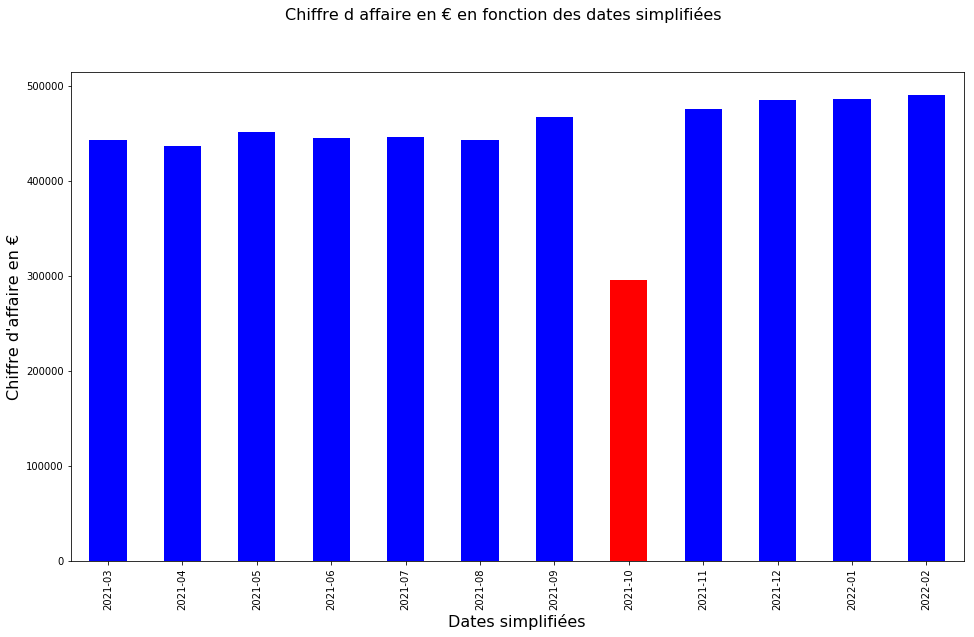

In [24]:
# Affichage du diagramme en tuyaux d'orgues
gb_CA_par_mois["CA"].plot(kind='bar', figsize=(16,9), color=['b', 'b', 'b', 'b', 'b', 'b', 'b','r'])
plt.xlabel("Dates simplifiées", fontsize=16) 
plt.ylabel("Chiffre d'affaire en €", fontsize=16)  
plt.suptitle('Chiffre d affaire en € en fonction des dates simplifiées' , fontsize=16)
plt.savefig('CA_date')
plt.show()

In [25]:
# Nous allons rechercher les causes de cette chute du CA sur 2021-10
# ajout d'une nouvelle colonne 'dates_simplifiees_jours'
sous_jointure['dates_simplifiees_jours'] = sous_jointure.date.map(lambda x: x.strftime('%Y-%m-%d'))
sous_jointure.head()

,session_id,date,dates_simplifiees,id_prod,price,categ,client_id,sex,age,dates_simplifiees_jours
0,s_18746,2021-04-10 18:37:28.723910,2021-04,0_1483,4.99,0,c_4450,f,45,2021-04-10
1,s_159142,2022-02-03 01:55:53.276402,2022-02,2_226,65.75,2,c_277,f,22,2022-02-03
2,s_94290,2021-09-23 15:13:46.938559,2021-09,1_374,10.71,1,c_4270,f,43,2021-09-23
3,s_105936,2021-10-17 03:27:18.783634,2021-10,0_2186,4.20,0,c_4597,m,59,2021-10-17
4,s_63642,2021-07-17 20:34:25.800563,2021-07,0_1351,8.99,0,c_1242,f,42,2021-07-17


In [26]:
# nous allons classer les variables dans un ordre plus cohérent
sous_jointure = sous_jointure[['session_id','date','dates_simplifiees','dates_simplifiees_jours','id_prod','price',
                               'categ','client_id','sex','age']]
sous_jointure.head()

,session_id,date,dates_simplifiees,dates_simplifiees_jours,id_prod,price,categ,client_id,sex,age
0,s_18746,2021-04-10 18:37:28.723910,2021-04,2021-04-10,0_1483,4.99,0,c_4450,f,45
1,s_159142,2022-02-03 01:55:53.276402,2022-02,2022-02-03,2_226,65.75,2,c_277,f,22
2,s_94290,2021-09-23 15:13:46.938559,2021-09,2021-09-23,1_374,10.71,1,c_4270,f,43
3,s_105936,2021-10-17 03:27:18.783634,2021-10,2021-10-17,0_2186,4.20,0,c_4597,m,59
4,s_63642,2021-07-17 20:34:25.800563,2021-07,2021-07-17,0_1351,8.99,0,c_1242,f,42


In [27]:
# Nous allons rechercher dans la table initiale les causes de cette chute du CA sur 2021-10 en travaillant sur les
# mois suivants : septembre, octobre et novembre
a = sous_jointure.loc[sous_jointure.dates_simplifiees.isin(['2021-09', '2021-10', '2021-11']),:]
b = a.groupby(by='dates_simplifiees_jours').sum()

In [28]:
b = b.drop(columns=['age', 'categ'])

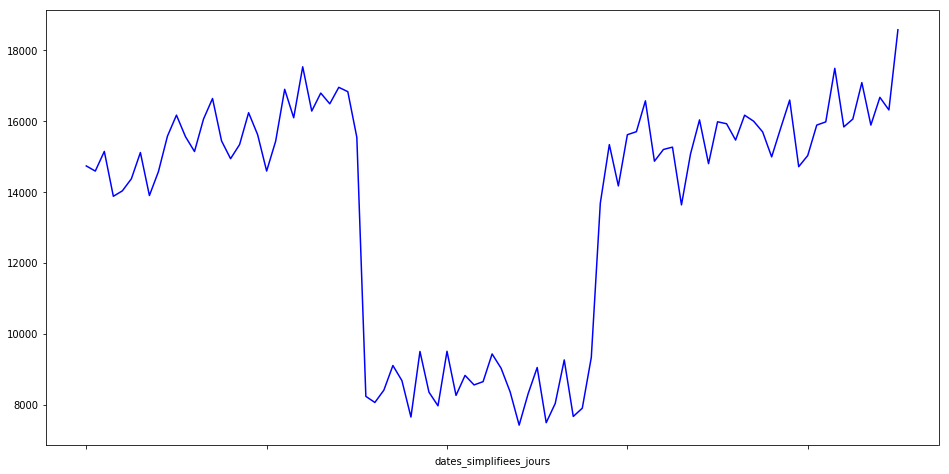

In [29]:
# affichage du plot 
b['price'].plot(figsize=(16,8), color=['b'])
plt.savefig('baisse_CA')
plt.show()

In [30]:
# après lecture du graph, nous avons 3 semaines en octobre, où l'on peut observer une baisse substencielle du CA 

# Mission n°3

Voici quelques questions supplémentaires, que votre manager vous a posées :

- Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
- Y a-t-il une corrélation entre l'âge des clients et :
   - le montant total des achats
   - la fréquence d’achat (ie. nombre d'achats par mois par exemple)
   - la taille du panier moyen (en nombre d’articles)
   - les catégories de produits achetés

# Recherche de dépendance on non entre le sexe des clients et les catégories de produits achetés

In [31]:
# nous devons travailler avec 2 variables qualitatives, nous allons donc faire appel à un tableau de contingence 
X = "sex"
Y = "categ"

c = sous_jointure[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = sous_jointure[X].value_counts()
ty = sous_jointure[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(sous_jointure)
cont

categ,0,1,2,Total
sex,,,,
f,101206.0,53774.0,8122.0,163102.0
m,94064.0,48851.0,7634.0,150549.0
total,195270.0,102625.0,15756.0,313651.0


In [32]:
cont.iloc[0:2,0:3]

categ,0,1,2
sex,,,
f,101206.0,53774.0,8122.0
m,94064.0,48851.0,7634.0


In [33]:
# De ce tableau de contingence, nous ne pouvons en tirer aucune conclusion de corrélation, car nous ne connaissons pas
# dans l'échantillon le pourcentage de femmes par rapport aux hommes
# pour plus de précision, nous allons faire appel à un tableau de contingence coloré

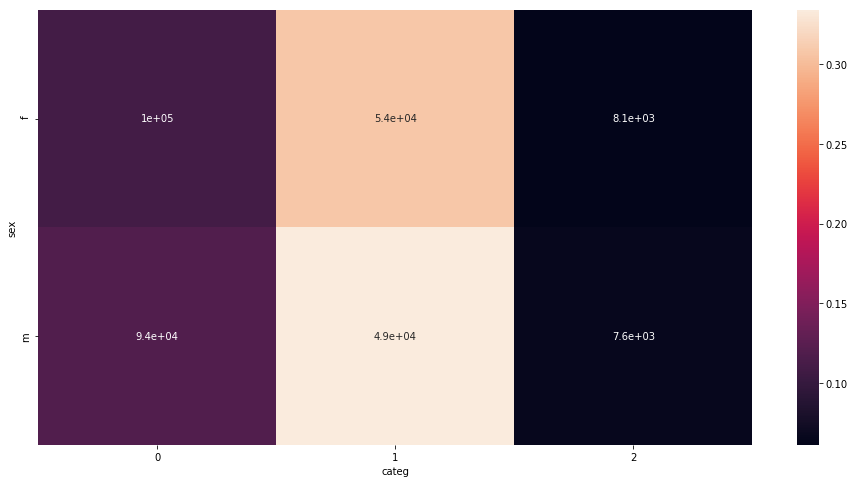

In [34]:
# affichage du tableau de contingence coloré avec les valeurs de ξn (cf règle graduée du graphique)
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(sous_jointure)
indep = tx.dot(ty.T) / n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
plt.figure(figsize=(16,8))
sns.heatmap(mesure/xi_n,annot=c)
plt.savefig('tableau_conting_coloré')
plt.show()

In [35]:
# nous observons une corrélation entre les variables :
#   - d'une part entre le sexe des clients et le nombre d'articles achetés
#   - d'autre part entre le categ et le nombre d'articles achetés

In [36]:
# pour vérifier ces observations, nous allons lancer un test d'indépendance
chi2, pvalue, degrees, expected = chi2_contingency(cont.iloc[0:2,0:3])
chi2, degrees, pvalue


(10.110865513726571, 2, 0.006374607510181767)

In [37]:
# D'après nos recherches nous avons un chi2 théorique de 5,99, celui-ci est inférieur à notre chi2 observé, le test 
# d'indépendance mathématique n'est pas vérifié, les variables sont donc dépendantes (corrélées dirait-on avec des 
# variables quantitatives)
# de plus pvalue inférieure à 0.05, ce test vient confirmer la dépendance de ces 2 variables qualitatives

# Recherche de corrélation on non entre l'âge des clients et le montant total des achats

In [38]:
gb_age_total_achats = sous_jointure.groupby(['age', 'client_id']).sum()
gb_age_total_achats.head()

price  categ
age client_id               
18  c_1042     193.58      7
    c_1046     486.16     14
    c_1065     670.44     25
    c_1088     283.43     10
    c_109      400.20     11

In [39]:
gb_age_total_achats = gb_age_total_achats.groupby('age').mean()
gb_age_total_achats.columns = ['montant','categ']
gb_age_total_achats.head()

,montant,categ
age,,
18,675.945034,19.681922
19,610.078552,17.731034
20,620.150000,18.082759
21,679.051840,19.280000
22,589.056250,17.536765


In [40]:
# montant total des achats en fonction de l'âge des clients
gb_age_total_achats = sous_jointure.groupby(['age', 'client_id']).sum()
gb_age_total_achats = gb_age_total_achats.groupby('age').mean()
gb_age_total_achats = gb_age_total_achats.drop(columns='categ')
gb_age_total_achats = gb_age_total_achats.reset_index()
gb_age_total_achats.columns = ['age','montant']
gb_age_total_achats.head()

,age,montant
0,18,675.945034
1,19,610.078552
2,20,620.150000
3,21,679.051840
4,22,589.056250


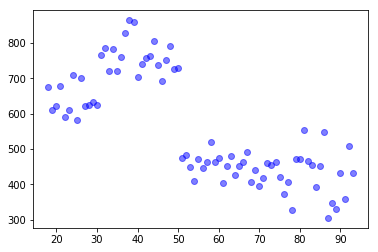

In [41]:
# Affichage du scatter plot
plt.plot(gb_age_total_achats['age'],gb_age_total_achats["montant"],'o',alpha=0.5, color='b')
plt.savefig('scatterplot_age_montant')
plt.show()

In [42]:
# la colonne 'age' est transformée en index en vu de l'affichage du graphe avec les bonnes valeurs en abscisses
gb_age_total_achats.set_index('age', inplace=True)
gb_age_total_achats.columns = ['montant']
gb_age_total_achats.head()

,montant
age,
18,675.945034
19,610.078552
20,620.150000
21,679.051840
22,589.056250


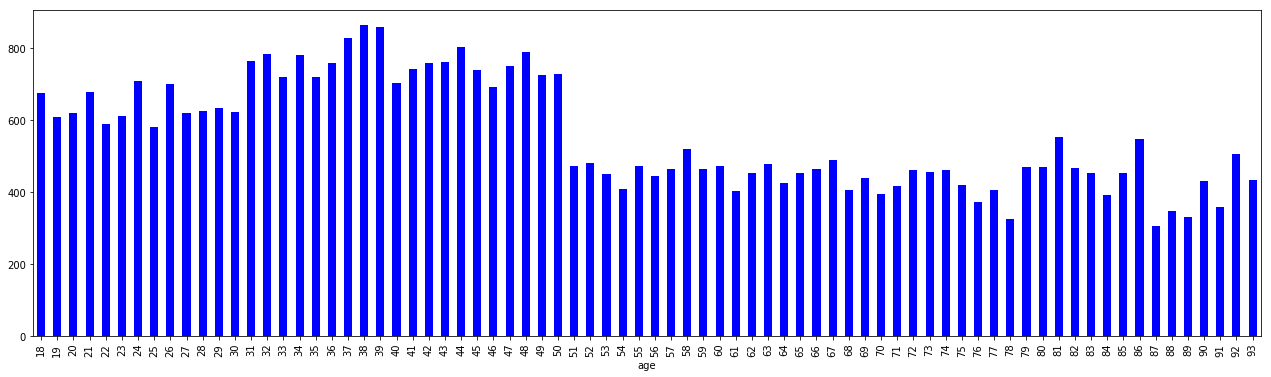

In [43]:
# Affichage du diagramme en tuyaux d'orgues
gb_age_total_achats["montant"].plot(kind='bar', figsize=(22,6), color='b')
plt.savefig('diag_age_montant')
plt.show()

In [44]:
# reset de l'index de façon à ensuite pouvoir utiliser les variables 'age' et 'montant'
gb_age_total_achats = gb_age_total_achats.reset_index()
gb_age_total_achats.head()

,age,montant
0,18,675.945034
1,19,610.078552
2,20,620.150000
3,21,679.051840
4,22,589.056250


In [45]:
# Calcul du coefficient de Pearson
a = st.pearsonr(gb_age_total_achats["age"],gb_age_total_achats["montant"])[0]
a

-0.7486658714239125

In [46]:
# résultat identique avec une fonction d'équation
gb_age_total_achats['age'].corr(gb_age_total_achats["montant"])

-0.7486658714239125

In [47]:
# Calcul du coefficient de détermination noté R2
R2 = a*a
R2

0.5605005870349263

In [48]:
# au regard du résultat il y a une corrélation linéaire et statistique mais il faudrait aller plus loin pour voir si il
# y a un lien de cause à effet dans la réalité, alors cette corrélation serait concrète 

# Résultats à nuancer :

# D'une part, en cas de corrélation linéaire et statistique, il n'y a pas forcément de lien de cause à effet dans la 
# réalité
# D'une part, le coefficient de Pearson ne détecte les relations que lorsqu'elles sont linéaires, c'est-à-dire lorsque 
# les points sont plutôt bien alignés sur une ligne droite, nous pouvons donc avoir une forte corrélation dans la 
# réalité sans pour autant avoir un coefficient de Pearson très élevé

# Recherche de corrélation on non entre l'âge des clients et la fréquence d'achat (ie. nombre d'achats par mois par exemple)

In [49]:
# .head() sur le groupby pour bien en visualiser le fonctionnement
test = sous_jointure.groupby(['age', 'dates_simplifiees', 'client_id', 'id_prod']).size()
test.head()

age  dates_simplifiees  client_id  id_prod
18   2021-03            c_1046     1_540      1
                        c_1065     1_677      1
                                   2_104      1
                                   2_135      1
                        c_1094     2_35       1
dtype: int64

In [50]:
gb_frequence_achat = sous_jointure.groupby(['age', 'dates_simplifiees']).size()
gb_frequence_achat = gb_frequence_achat.groupby('age').mean()
gb_frequence_achat = gb_frequence_achat.reset_index()
gb_frequence_achat.columns = ['age','nb_achats_mois']
gb_frequence_achat.head()

,age,nb_achats_mois
0,18,612.333333
1,19,181.833333
2,20,185.333333
3,21,169.333333
4,22,181.250000


In [51]:
# la colonne 'age' est transformée en index en vu de l'affichage du graphe avec les bonnes valeurs en abscisses
gb_frequence_achat.set_index('age', inplace=True)
gb_frequence_achat.head()

,nb_achats_mois
age,
18,612.333333
19,181.833333
20,185.333333
21,169.333333
22,181.250000


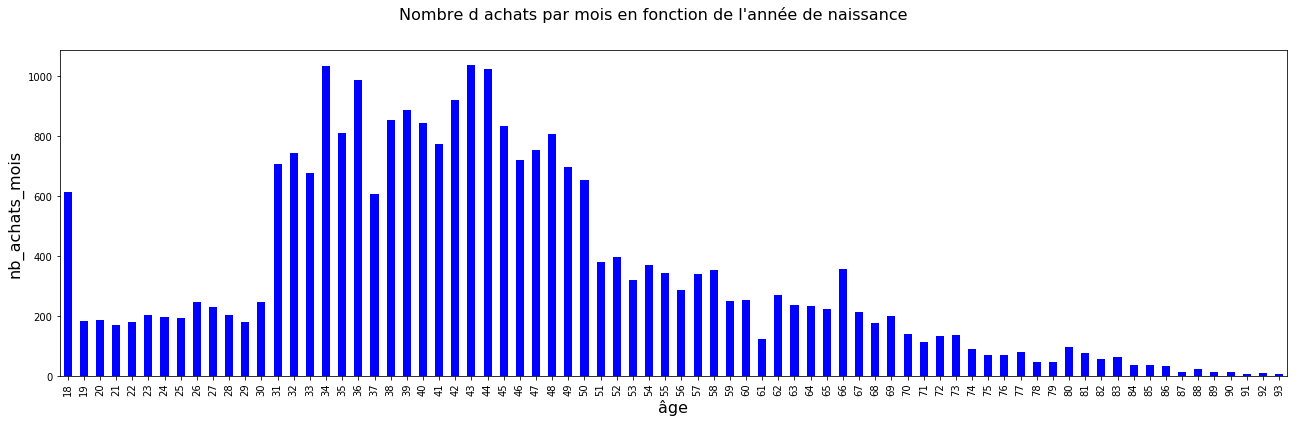

In [52]:
# Affichage du diagramme en tuyaux d'orgues
gb_frequence_achat["nb_achats_mois"].plot(kind='bar', figsize=(22,6), x='birth', y='A', color='b')
plt.xlabel("âge", fontsize=16)
plt.ylabel("nb_achats_mois", fontsize=16)
plt.suptitle("Nombre d achats par mois en fonction de l'année de naissance", fontsize=16)
plt.savefig('diag_age_freq')
plt.show()

In [53]:
# reset de l'index de façon à ensuite pouvoir utiliser les variables 'age' et 'nb_achats_mois'
gb_frequence_achat = gb_frequence_achat.reset_index()
gb_frequence_achat.head()

,age,nb_achats_mois
0,18,612.333333
1,19,181.833333
2,20,185.333333
3,21,169.333333
4,22,181.250000


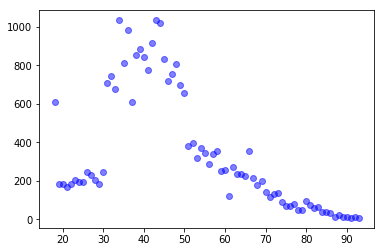

In [54]:
# Affichage du scatter plot
plt.plot(gb_frequence_achat['age'],gb_frequence_achat["nb_achats_mois"],'o',alpha=0.5, color='b')
plt.savefig('scatterplot_age_freq')
plt.show()

In [55]:
# Calcul du coefficient de Pearson
a = st.pearsonr(gb_frequence_achat["age"],gb_frequence_achat["nb_achats_mois"])[0]
a

-0.5703584540583574

In [56]:
# résultat identique avec une fonction d'équation
gb_frequence_achat['age'].corr(gb_frequence_achat["nb_achats_mois"])

-0.5703584540583574

In [57]:
# Calcul du coefficient de détermination noté R2
R2 = a*a
R2

0.32530876611583937

In [58]:
# au regard du résultat il y a une corrélation linéaire et statistique mais il faudrait aller plus loin pour voir si il
# y a un lien de cause à effet dans la réalité, alors cette corrélation serait concrète 

# Résultats à nuancer :

# D'une part, en cas de corrélation linéaire et statistique, il n'y a pas forcément de lien de cause à effet dans la 
# réalité
# D'une part, le coefficient de Pearson ne détecte les relations que lorsqu'elles sont linéaires, c'est-à-dire lorsque 
# les points sont plutôt bien alignés sur une ligne droite, nous pouvons donc avoir une forte corrélation dans la 
# réalité sans pour autant avoir un coefficient de Pearson très élevé

# Recherche de corrélation on non entre l'âge des clients et la taille du panier moyen (en nombre d'articles)

In [59]:
# taille du panier moyen en fonction de l'âge des clients
gb_panier_moyen = sous_jointure.groupby(['age', 'session_id']).size()
gb_panier_moyen = gb_panier_moyen.groupby('age').mean()
gb_panier_moyen = gb_panier_moyen.reset_index()
gb_panier_moyen.columns = ['age','nb_articles']
gb_panier_moyen.head()

,age,nb_articles
0,18,1.757054
1,19,1.724901
2,20,1.742947
3,21,1.732310
4,22,1.843220


In [60]:
# la colonne 'age' est transformée en index en vu de l'affichage du graphe avec les bonnes valeurs en abscisses
gb_panier_moyen.set_index('age', inplace=True)
gb_panier_moyen.head()

,nb_articles
age,
18,1.757054
19,1.724901
20,1.742947
21,1.732310
22,1.843220


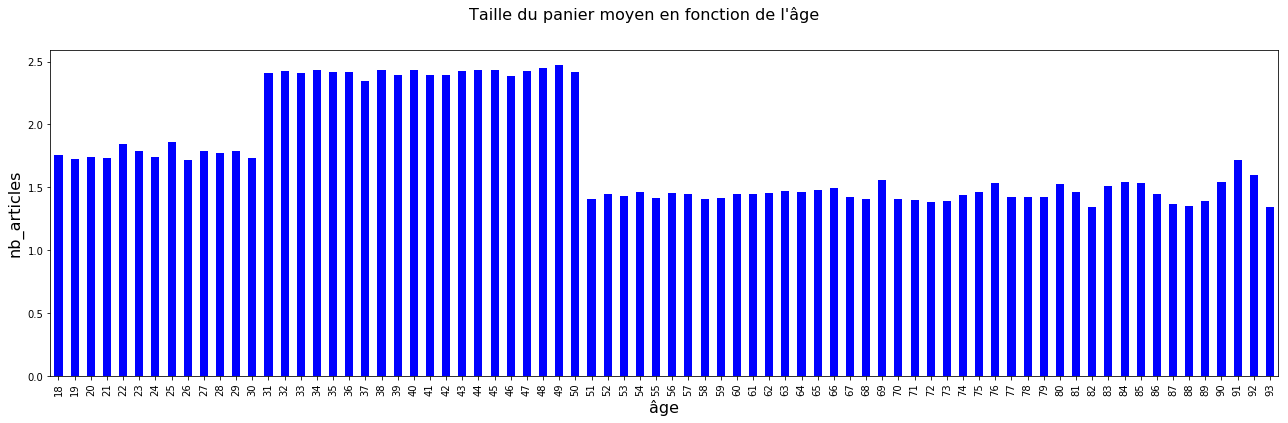

In [61]:
# Affichage du diagramme en tuyaux d'orgues
gb_panier_moyen["nb_articles"].plot(kind='bar', figsize=(22,6), color='b')
plt.xlabel("âge", fontsize=16)
plt.ylabel("nb_articles", fontsize=16)
plt.suptitle("Taille du panier moyen en fonction de l'âge", fontsize=16)
plt.savefig('diag_age_panier')
plt.show()

In [62]:
# reset de l'index de façon à ensuite pouvoir utiliser les variables 'age' et 'nb_articles'
gb_panier_moyen = gb_panier_moyen.reset_index()
gb_panier_moyen.head()

,age,nb_articles
0,18,1.757054
1,19,1.724901
2,20,1.742947
3,21,1.732310
4,22,1.843220


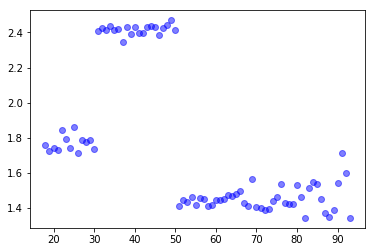

In [63]:
# Affichage du scatter plot
plt.plot(gb_panier_moyen['age'],gb_panier_moyen["nb_articles"],'o',alpha=0.5, color='b')
plt.savefig('scatterplot_age_panier')
plt.show()

In [64]:
# Calcul du coefficient de Pearson
a = st.pearsonr(gb_panier_moyen["age"],gb_panier_moyen["nb_articles"])[0]
a

-0.5946358543171337

In [65]:
# résultat identique avec une fonction d'équation
gb_panier_moyen["age"].corr(gb_panier_moyen["nb_articles"])

-0.5946358543171337

In [66]:
# Calcul du coefficient de détermination noté R2
R2 = a*a
R2

0.3535917992394675

In [67]:
# au regard du résultat il y a une corrélation linéaire et statistique mais il faudrait aller plus loin pour voir si il
# y a un lien de cause à effet dans la réalité, alors cette corrélation serait concrète 

# Résultats à nuancer :

# D'une part, en cas de corrélation linéaire et statistique, il n'y a pas forcément de lien de cause à effet dans la 
# réalité
# D'une part, le coefficient de Pearson ne détecte les relations que lorsqu'elles sont linéaires, c'est-à-dire lorsque 
# les points sont plutôt bien alignés sur une ligne droite, nous pouvons donc avoir une forte corrélation dans la 
# réalité sans pour autant avoir un coefficient de Pearson très élevé

# Recherche de corrélation on non entre l'âge des clients et les catégories de produits achetés

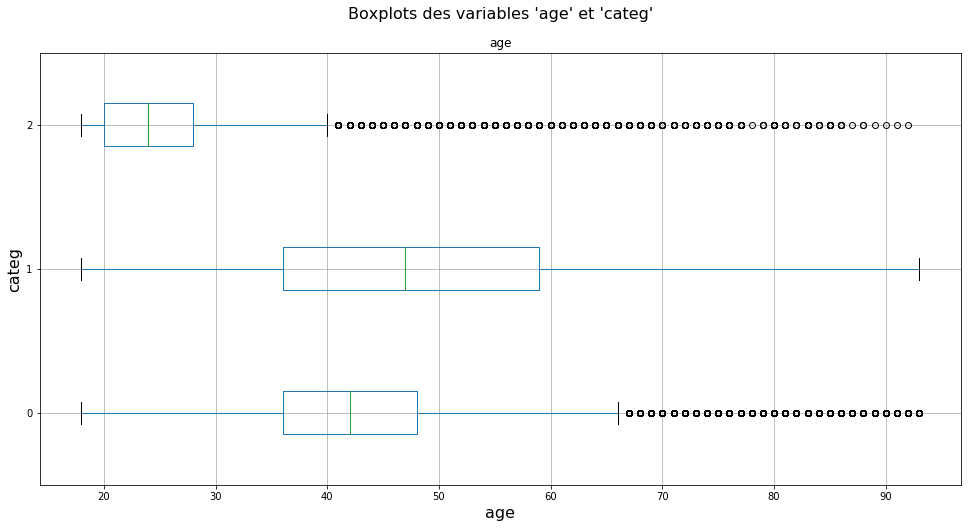

In [68]:
# nous allons afficher les boxplots prenant en variables :
#    - qualitative : 'categ'
#    - quantitative : 'age'
sous_jointure.boxplot(column='age', by='categ', vert=False, figsize=(16,8))
plt.xlabel("age", fontsize=16)  
plt.ylabel("categ", fontsize=16)
plt.suptitle("Boxplots des variables 'age' et 'categ'", fontsize=16)
plt.savefig('boxplot_categ_birth')
plt.show()

In [69]:
# Calcul de η2 entre les variables 'birth' et 'categ' 
X = "age" # quantitative
Y = "categ" # qualitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_jointure[X],sous_jointure[Y])

0.26672176625399563

In [70]:
# Nous obtenons un résultat proche de 0.27
# Pour l’eta-squared, nous n'avons pas de valeur étalon pour affirmer si il y a corrélation ou pas entre l'âge des 
# clients et la catégorie des produits achetée 
# En revanche, visuellement, nous avons pu oberser une corrélation sur le graphique représentant les boxplots !
# Mais bien entendu, tout cela reste à confirmer